In [111]:
import pandas as pd
import sqlite3

con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## run a query that gets the `datetime` from the `pageviews` table, selecting only the `users` and not the `admins`

In [112]:
df = pd.read_sql_query(
    '''
    SELECT timestamp AS commits
    FROM checker
    WHERE uid LIKE 'user_%'
    ''',
    con,
    parse_dates=['commits'],
)
df['daytime'] = pd.cut(
    df['commits'].dt.hour, 
    bins=[0, 4, 10, 17, 24], 
    labels=['night','morning', 'afternoon', 'evening']
)
pivot_table = df.pivot_table(
    index=df['commits'].dt.date,
    columns='daytime',
    aggfunc='count',
    values='commits',
    observed=False
)
pivot_table

daytime,night,morning,afternoon,evening
commits,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,0,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,0,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


## using Pandas method `.plot()`, create a graph
* the size of the font should be 8
* the size of the figure is (15,8)
* the graph must have the title Views per day
* notice the rotation of xticks on the graph below

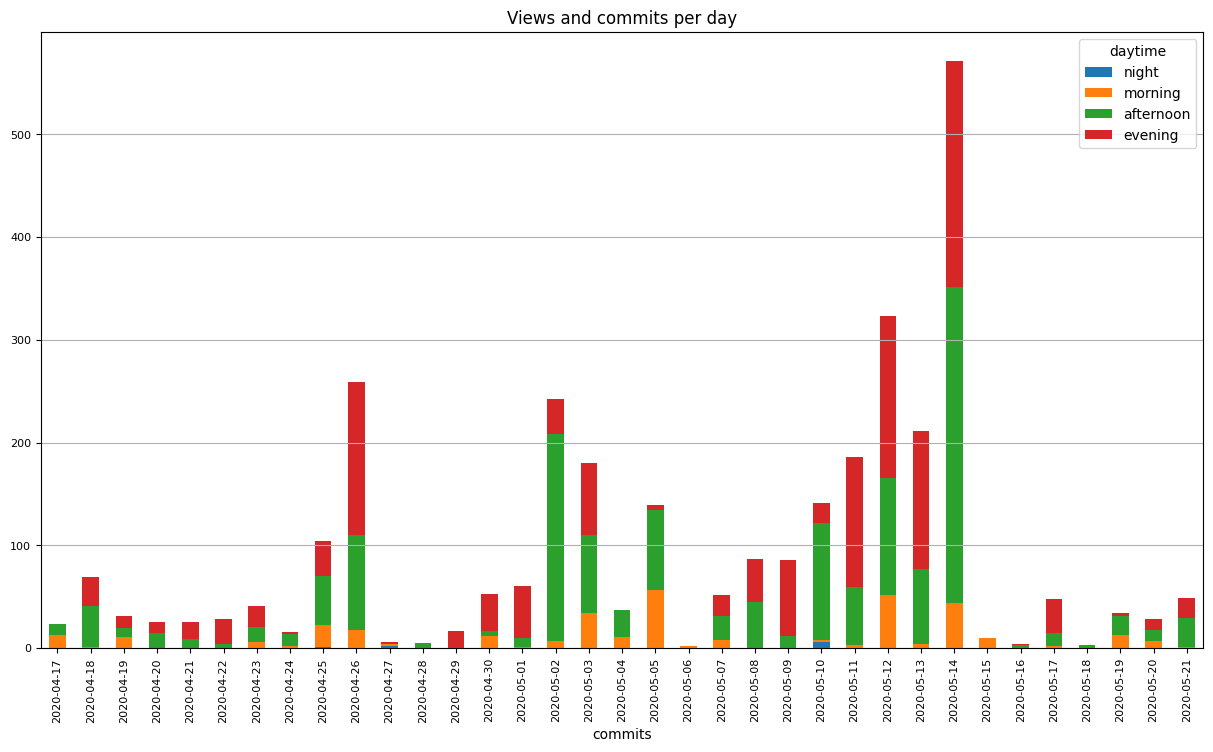

In [113]:
pivot_table.plot(
    kind='bar',
    stacked=True,
    fontsize=8,
    figsize=(15, 8),
    title='Views and commits per day',
    rot=90,
).grid(axis='y')

## When do our users usually commit the labs: in the night, morning, afternoon, or evening
The answer is afternoon and evening

## Which day has:
* the most number of commits
* and at the same time, the number of commits in the evening is higher than in the afternoon?

2020-05-12

## close the connection to the database

In [114]:
con.close()